# **Credit Card Fraud Detection Project** 💳⚠️

Ce projet **vise à détecter les transactions frauduleuses** sur des cartes de crédit en utilisant des techniques de **Data Science et Machine Learning**.  

Le dataset utilisé contient les colonnes suivantes :  

- **Time** ⏰ : Le temps écoulé (en secondes) depuis la première transaction dans le dataset.  
- **V1, V2, ..., V28** 🔢 : Variables anonymisées issues d'une **transformation PCA** pour protéger la confidentialité des clients.  
- **Amount** 💰 : Montant de la transaction.  
- **Class** 🚨 : Indique si la transaction est **frauduleuse (1)** ou **non frauduleuse (0)**.  

## **Objectifs du projet** 🎯
1. **Analyser le dataset** pour comprendre la distribution des transactions et des fraudes.  
2. **Prétraiter les données** (normalisation, gestion du déséquilibre de classes, etc.).  
3. **Entraîner des modèles de machine learning** pour détecter les fraudes.  
4. **Évaluer les performances** des modèles avec des métriques adaptées comme la **precision, recall et F1-score**.  
5. Fournir une **solution prédictive efficace** pour aider les institutions financières à **réduire les pertes liées on des fraudes**.
précision 🎯**  learn, XGBoost 🏎️  


# **Imports et Préparation de l'Environnement** 🛠️
premièrement on va oc **imporrte toutes les bibliothèques et modules nécessaires** pour le projet de détection de fraude sur les cartes de crédit. Il prépare l'environnement pour :

- **Manipulation et analyse des données** : `pandas`, `numpy`  
- **Visualisation** : `matplotlib`, `seaborn`  
- **Statistiques et transformations** : `scipy`, `stats`, `boxcox`  
- **Prétraitement des données** : `sklearn.preprocessing`, `StandardScaler`  
- **Modélisation et apprentissage automatique** :  
  - Régression et classification : `LogisticRegression`, `Ridge`, `Lasso`  
  - Arbres et ensembles : `DecisionTreeClassifier`, `RandomForestClassifier`, `AdaBoostClassifier`  
  - Support Vector Machines et KNN : `SVC`, `KNeighborsClassifier`  
  - XGBoost : `XGBClassifier`, `plot_importance`  
- **Validation et recherche d'hyperparamètres** : `train_test_split`, `KFold`, `StratifiedKFold`, `GridSearchCV`, `RandomizedSearchCV`, `RepeatedKFold`  
- **Gestion du déséquilibre des classes** : `RandomOverSampler`, `imblearn.over_sampling`  
- **Autres outils utiles** : gestion du temps (`time`), suppression des warnings tion de fraudes.


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn import over_sampling
import sklearn
import time
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

import warnings 
warnings.filterwarnings("ignore")


D'abord on va **charger le dataset des transactions par carte de crédit** depuis le fichier `creditcard.csv` dans un **DataFrame pandas** nommé `credit_card_transactions_data`.  

Le DataFrame contiendra toutes les colonnes du dataset, y compris les **variables anonymisées (V1 à V28)**, le **montant de la transaction (Amount)** et la **classe indiquant la fraude (Class)**.  

Cela constitue la **base pour toutes les étapes suivantes** du projet : exploration, prétraitement, modélisation et évaluation des modèles.


In [29]:
credit_card_transactions_data = pd.read_csv("creditcard.csv")

In [30]:
credit_card_transactions_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Cette ligne affiche un **aperçu des informations du dataset** `credit_card_transactions_data`.  

Elle permet de connaître :  
- Le **nombre total de transactions** : 284 807.  
- Le **nombre et le type de colonnes** : 31 colonnes au total, dont 30 **float64** (Time, V1 à V28, Amount) et 1 **int64** (C).s ).  
- La **présence de valeurs manquantes** : aucolonne ne contient de valeurs nulles

In [31]:
credit_card_transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [32]:
credit_card_transactions_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Cette ligne permet de **comprendre la distribution des classes** dans le dataset `credit_card_transactions_data`.  

- **0 (non frauduleuse)** : 284 315 transactions  
- **1 (frauduleuse)** : 492 transactions  

On remarque que le dataset est **très déséquilibré**, avec une proportion très faible de fraudeaude.


In [33]:
credit_card_transactions_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Cette commande calcule et **visualise la proportion de chaque classe** dans le dataset.  

- Elle montre que les transactions **non frauduleuses (Class 0)** représentent environ **99,83 %** des données.  
- Les transactions **frauduleuses (Class 1)** représentent seulement **0,17 %** des données.  

La commande `.plot.pie()` crée un **diagramme circulaire** pour visualiser ce déséquilibre, ce qui aide à **comprendre l'importance de traiter le problème des classes déséquilibrées** avant de former un modèle.


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

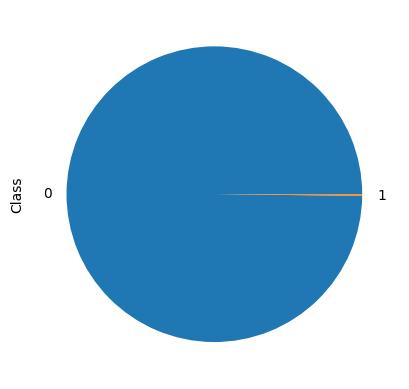

In [34]:
print((credit_card_transactions_data.groupby("Class")["Class"].count() / credit_card_transactions_data["Class"].count()) * 100)
((credit_card_transactions_data.groupby("Class")["Class"].count() / credit_card_transactions_data["Class"].count()) * 100).plot.pie()

Ce bloc crée un **graphique pour visualiser le nombre de transactions par classe**.  

- `sns.countplot` affiche le **nombre de transactions non frauduleuses (Class 0)** et **frauduleuses (Class 1)**.  
- Les axes sont étiquetés pour montrer le **nombre d'enregistrements par classe**.  
- Le titre met en évidence que le graphique représente le **comptage des classes**.  


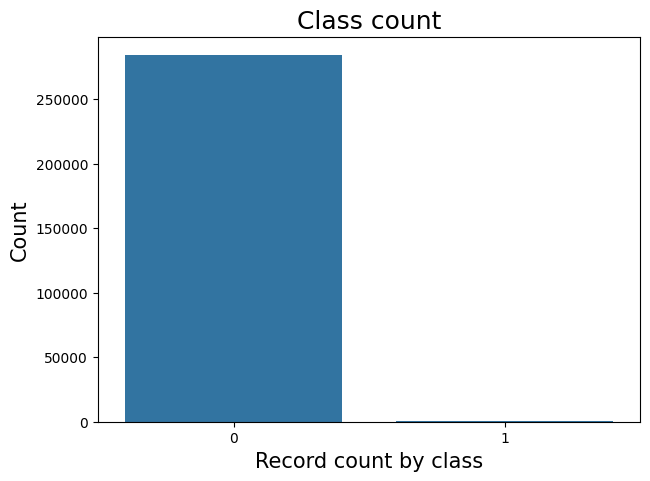

In [35]:
plt.figure(figsize=(7,5))
sns.countplot(x='Class', data=credit_card_transactions_data)
plt.title("Class count" , fontsize=18)
plt.xlabel("Record count by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

Ce bloc calcule et **visualise la matrice de corrélation** du dataset .  

- `credit_card_transactions_data.corr()` calcule la **corrélation entre toutes les colonnes numériques**.  
- `sns.heatmap` crée une **carte de chaleur** pour représenter visuellement ces corrélations, avec les valeurs annotées pour plus de clarté.  
- La palette `coolwarm` permet de distinguer facilement les **corrélations positives et négatives**.  

Cette visualisation aide à **identifier les relations entre les variables** et peut guider la **sélection des caractéristiques** ou la **détection de variables fortement corrélées** avant la modélisation.


In [36]:
corr = credit_card_transactions_data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


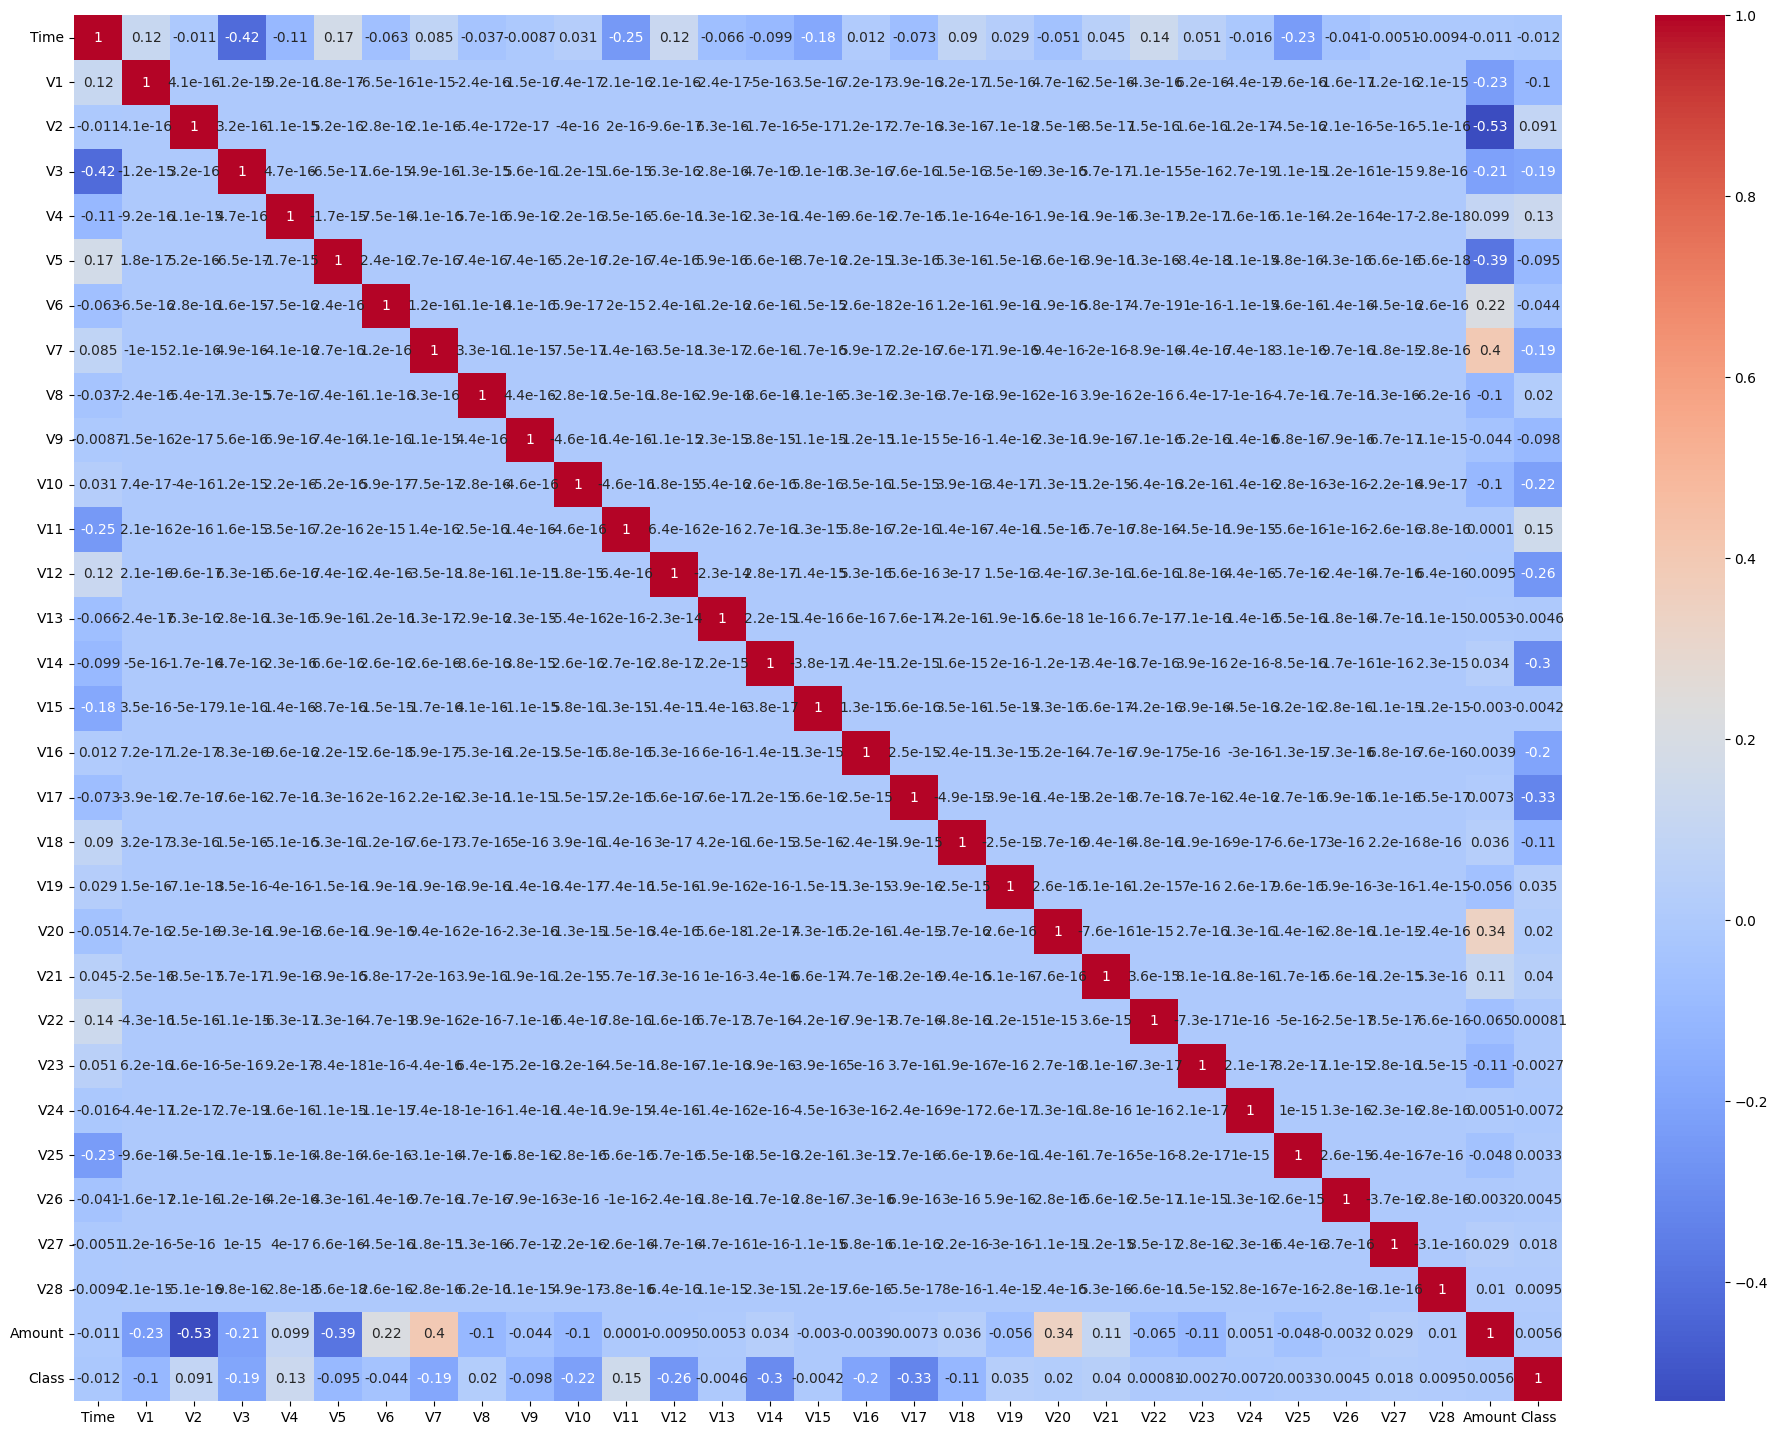

In [37]:
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

Ce bloc transforme la colonne **`Time`** du dataset en plusieurs composantes temporelles pour faciliter l'analyse :  

- `pd.to_timedelta` convertit la colonne `Time` (en secondes) en **objet timedelta**.  
- De cette transformation, on extrait :  
  - **`Time_Day`** : le nombre de jours écoulés depuis la première transaction.  
  - **`Time_Hour`** : l'heure de la transaction dans la journée.  
  - **`Time_Min`** : les minutes de la transaction.  
- Ensuite, certaines colonnes sont **supprimées** (`Time`, `Time_Day`, `Time_Min`) pour ne conserver que les informations pertinentes pour la modélisation, comme `Time_Hour`.  


In [38]:
Delta_time = pd.to_timedelta(credit_card_transactions_data['Time'], unit='s')

credit_card_transactions_data['Time_Day'] = (Delta_time.dt.components.days).astype(int)
credit_card_transactions_data['Time_Hour'] = (Delta_time.dt.components.hours).astype(int)
credit_card_transactions_data['Time_Min'] = (Delta_time.dt.components.minutes).astype(int)

In [39]:
credit_card_transactions_data.drop(['Time', 'Time_Day', 'Time_Min'], axis=1, inplace=True)


Ce bloc prépare les **features et la cible** pour la modélisation :  

- `X` contient toutes les colonnes **sauf `Class`**, représentant les **caractéristiques**.  
- `y` contient uniquement la colonne **`Class`**, qui est la **variable cible** indiquant si une transaction est **frauduleuse (1) ou non (0)**.  

Cette séparation est essentielle pour **entraîner et évaluer les modèles de machine learning**.


In [40]:
X = credit_card_transactions_data.drop(["Class"], axis=1)
y = credit_card_transactions_data["Class"]

In [41]:
X.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,23
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,23
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,23
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,23
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,23


Cette ligne **sépare le dataset en ensembles d'entraînement et de test** :  

- `X_train` et `y_train` : **données d'entraînement**, utilisées pour **entraîner le modèle**.  
- `X_test` et `y_test` : **données de test**, utilisées pour **évaluer les performances** du modèle sur des données non vues.  
- `test_size=0.2` signifie que **20 % des données** sont réservées pour le test.  
- `random_state=100` garantit que la **séparation est reproductible**.


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Ce bloc crée des **histogrammes superposés pour chaque feature** afin de comparer les distributions entre les transactions **légitimes** et **frauduleuses** :  

- `cols` contient la liste de toutes les colonnes/features.  
- `legit_records` et `fraud_records` sont des **masques booléens** pour séparer les transactions non frauduleuses et frauduleuses.  
- Pour chaque colonne, `sns.distplot` trace :  
  - En **vert** : la distribution des transactions légitimes.  
  - En **rouge** : la distribution des transactions frauduleuses.  
- Les sous-graphes (`plt.subplot`) permettent de **visualiser toutes les features dans une seule figure**.  

Cette visualisation aide à **identifier quelles variables peuvent mieux différencier les fraudes des transactions normales**.


In [43]:
cols = list(X.columns.values)

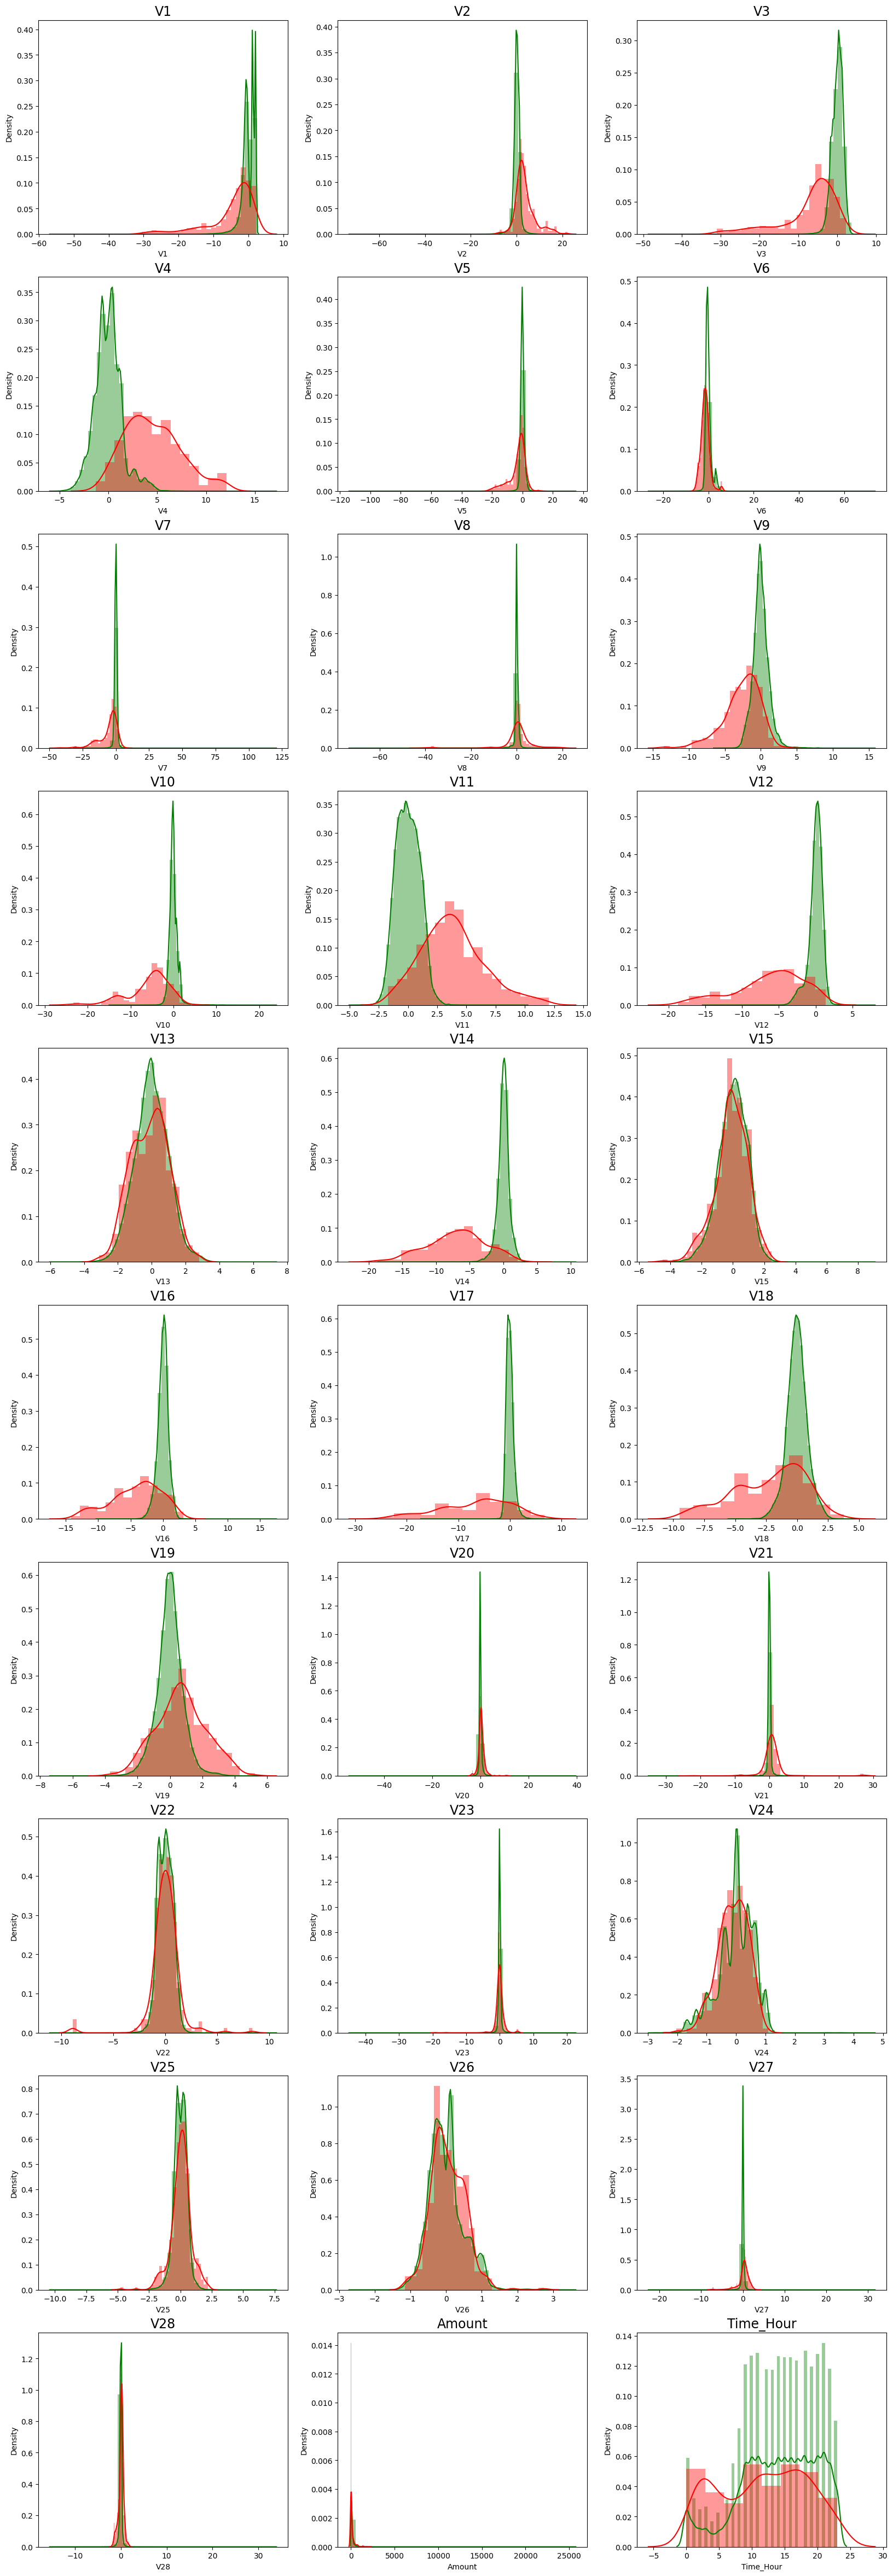

In [44]:
legit_records = credit_card_transactions_data.Class == 0
fraud_records = credit_card_transactions_data.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][legit_records], color='green')
    sns.distplot(X[col][fraud_records], color='red')
    plt.title(col, fontsize=17)

plt.show()
    

Cette ligne crée un **DataFrame vide nommé `df_Results`** pour **stocker les résultats des différents modèles** testés dans le projet.  

- Les colonnes du DataFrame sont :  
  - **`Methodology`** : la méthode ou approche utilisée.  
  - **`Model`** : le nom du modèle de machine learning.  
  - **`Accuracy`** : la précision obtenue sur les données de test.  
  - **`roc_value`** : la valeur de l'AUC-ROC pour évaluer la capacité du modèle à distinguer les classes.  
  - **`threshold`** : le seuil choisi pour classer une transaction comme frauduleuse ou non.  

Ce DataFrame servira à **comparer facilement les performances de tous les modèles expérimentés**.


In [45]:
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'roc_value', 'threshold'])

Cette fonction **`buildAndRunLogisticModels`** permet de **construire, entraîner et évaluer des modèles de régression logistique** avec régularisation L1 et L2 sur le dataset de transactions :  

- **Hyperparamètres et validation croisée** :  
  - `num_C` définit une série de valeurs pour le paramètre de régularisation C.  
  - `KFold` est utilisé pour la **validation croisée à 10 plis**.  
- **Modèles** :  
  - `LogisticRegressionCV` avec **L1** (lasso) et **L2** (ridge) pour gérer la régularisation.  
- **Entraînement** : les deux modèles sont **ajustés sur les données d'entraînement**.  
- **Évaluation** :  
  - Calcul de **l’accuracy**, **matrices de confusion**, **classification report** et **valeurs ROC-AUC**.  
  - Calcul du **seuil optimal** pour classifier une transaction comme frauduleuse.  
  - Tracé des **courbes ROC** pour visualiser la performance sur les données de test.  
- **Stockage des résultats** :  
  - Les performances de chaque modèle (Accuracy, ROC-AUC, seuil) sont ajoutées au **DataFrame `df_Results`** pour comparaison ultérieure.  

Cette fonction permet donc de **tester et comparer efficacement deux approches de régression logistique** sur des données déséquilibrées.


In [46]:
def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

    num_C = list(np.power(10.0, np.arange(-10,10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)
    
    searchCV_l2 = linear_model.LogisticRegressionCV(Cs=num_C, penalty='l2', scoring='roc_auc', cv=cv_num, random_state=42, max_iter=10000, fit_intercept=True, solver='newton-cg', tol=10)
    
    searchCV_l1 = linear_model.LogisticRegressionCV(Cs=num_C, penalty='l1', scoring='roc_auc', cv=cv_num, random_state=42, max_iter=10000, fit_intercept=True, solver='liblinear', tol=10)
    
    searchCV_l1.fit(X_train, y_train)
    searchCV_l2.fit(X_train, y_train)
    print("max auc_roc for l1 : ", searchCV_l1.scores_[1].mean(axis=0).max())
    print("max auc_roc for l2 : ", searchCV_l2.scores_[1].mean(axis=0).max())
    
    print(" parameters for l1 regularisation ")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)
    
    print(" parameters for l2 regularisation ")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)
    
    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 = searchCV_l2.predict(X_test)
    
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1]
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1]
    
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)
    
    print("Accuracy of Logistic Model with l2 regularisation : {0}".format(Accuracy_l2))
    print("Confusion Matrix : " , metrics.confusion_matrix(y_test, y_pred_l2))
    print("Classification Report : ",metrics.classification_report(y_test, y_pred_l2))
    
    print("Accuracy of Logistic Model with l1 regularisation : {0}".format(Accuracy_l1))
    print("Confusion Matrix : " , metrics.confusion_matrix(y_test, y_pred_l1))
    print("Classification Report : ",metrics.classification_report(y_test, y_pred_l1))
    
    roc_value_l2 = metrics.roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc value: {0}".format(roc_value_l2))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold_l2 = thresholds[np.argmax(tpr-fpr)]
    print("threshold l2 : {0}".format(threshold_l2))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC  for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = pd.concat([df_Results, pd.DataFrame({
            'Methodology': [Methodology],
            'Model': ['Logistic Regression with L2 Regularization'],
            'Accuracy': [Accuracy_l2],
            'roc_value': [roc_value_l2],
            'threshold': [threshold_l2]
        })], ignore_index=True)
    
    roc_value_l1 = metrics.roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc value: {0}".format(roc_value_l1))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold_l1 = thresholds[np.argmax(tpr-fpr)]
    print("threshold l1 : {0}".format(threshold_l1))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC  for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = pd.concat([df_Results, pd.DataFrame({
            'Methodology': [Methodology],
            'Model': ['Logistic Regression with L1 Regularization'],
            'Accuracy': [Accuracy_l1],
            'roc_value': [roc_value_l1],
            'threshold': [threshold_l1]
        })], ignore_index=True)
    return df_Results

Cette fonction **`buildAndRunKNNModels`** permet de **construire, entraîner et évaluer un modèle K-Nearest Neighbors (KNN)** sur le dataset de transactions :  

- **Modèle KNN** :  
  - `KNeighborsClassifier` avec **5 voisins** et parallélisation (`n_jobs=16`) pour accélérer l'entraînement.  
- **Entraînement** : le modèle est ajusté sur les **données d'entraînement** (`X_train`, `y_train`).  
- **Évaluation** :  
  - Calcul de **l’accuracy**, **matrice de confusion** et **classification report** sur l'ensemble de test.  
  - Calcul des **probabilités prédites** pour la classe positive (fraude).  
  - Calcul de la **valeur ROC-AUC** et du **seuil optimal** pour classifier une transaction comme frauduleuse.  
  - Tracé de la **courbe ROC** pour visualiser la performance du modèle.  
- **Stockage des résultats** : les performances du modèle (Accuracy, ROC-AUC, seuil) sont ajoutées au **DataFrame `df_Results`** pour comparaison avec d'autres modèles.  

Cette fonction fournit une **évaluation complète du KNN** dans le contexte de la détection de fraude.


In [47]:
def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    
    knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = 16)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print("model score :", score)
    
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion Matrix : " , metrics.confusion_matrix(y_test, y_pred))
    print("Classification Report : ",metrics.classification_report(y_test, y_pred))
    
    knn_probs = knn.predict_proba(X_test)[:,1]
    
    knn_roc_value = metrics.roc_auc_score(y_test, knn_probs)
    print("knn roc value: {0}".format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold : {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC  for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = pd.concat([df_Results, pd.DataFrame({'Methodology': [Methodology], 'Model': ['KNN'], 'Accuracy': [score], 'roc_value': [knn_roc_value], 'threshold': [threshold]})], ignore_index=True)
    return df_Results

Cette fonction **`buildAndRunTreeModels`** permet de **construire, entraîner et évaluer des modèles d'arbre de décision** sur le dataset de transactions :  

- **Critères d'arbre** : `gini` et `entropy` sont testés pour mesurer la **pureté des nœuds** lors de la construction de l'arbre.  
- **Entraînement** : chaque arbre est ajusté sur les **données d'entraînement** (`X_train`, `y_train`).  
- **Évaluation** :  
  - Calcul de **l’accuracy**, **matrice de confusion** et **classification report** sur l'ensemble de test.  
  - Calcul des **probabilités prédites** pour la classe positive (fraude).  
  - Calcul de la **valeur ROC-AUC** et du **seuil optimal** pour classifier une transaction comme frauduleuse.  
  - Tracé de la **courbe ROC** pour visualiser la performance du modèle pour chaque critère.  
- **Stockage des résultats** : les performances de chaque arbre (Accuracy, ROC-AUC, seuil) sont ajoutées au **DataFrame `df_Results`** pour comparaison avec d'autres modèles.  

Cette fonction permet ainsi de **comparer facilement l'impact du critère choisi sur les performances de l'arbre de décision**.


In [48]:
def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    
    criteria = ['gini', 'entropy']
    scores = {}
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion = c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_probs = dt.predict_proba(X_test)[:,1]
        tree_roc_value = metrics.roc_auc_score(y_test, tree_probs)
        scores = test_score
        print(c + " score : {0}".format(test_score))
        print("Confusion Matrix : " , metrics.confusion_matrix(y_test, y_pred))
        print("Classification Report : ",metrics.classification_report(y_test, y_pred))
        print("tree roc value: {0}".format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_probs)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("tree threshold : {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC  for test dataset",'{:.1%}'.format(roc_auc))
        plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
        
        df_Results = pd.concat([df_Results, pd.DataFrame({'Methodology': [Methodology], 'Model': [f'Tree model with {c} criteria'], 'Accuracy': [test_score], 'roc_value': [tree_roc_value], 'threshold': [threshold]})], ignore_index=True)

    return df_Results
    

Cette fonction **`buildAndRunRandomForestModels`** permet de **construire, entraîner et évaluer un modèle Random Forest** sur le dataset de transactions :  

- **Modèle Random Forest** :  
  - `RandomForestClassifier` avec **100 arbres**, bootstrap activé et sélection aléatoire des features (`max_features='sqrt'`).  
- **Entraînement** : le modèle est ajusté sur les **données d'entraînement** (`X_train`, `y_train`).  
- **Évaluation** :  
  - Calcul de **l’accuracy**, **matrice de confusion** et **classification report** sur l'ensemble de test.  
  - Calcul des **probabilités prédites** pour la classe positive (fraude).  
  - Calcul de la **valeur ROC-AUC** et du **seuil optimal** pour classifier une transaction comme frauduleuse.  
  - Tracé de la **courbe ROC** pour visualiser la performance du modèle.  
- **Stockage des résultats** : les performances du modèle (Accuracy, ROC-AUC, seuil) sont ajoutées au **DataFrame `df_Results`** pour comparaison avec d'autres modèles.  

Cette fonction fournit une **évaluation complète du Random Forest** dans le contexte de la détection de fraude.


In [49]:
def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    
    RF_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)
    
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)
    print('Model Accuracy : {0}'.format(RF_test_score))
    
    RF_predictions = RF_model.predict(X_test)
    print("Confusion Matrix : " , metrics.confusion_matrix(y_test, RF_predictions))
    print("Classification Report : ",metrics.classification_report(y_test, RF_predictions))
    
    rf_probs = RF_model.predict_proba(X_test)[:,1]
    
    rf_roc_value = metrics.roc_auc_score(y_test, rf_probs)
    print("rf roc value: {0}".format(rf_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("RF threshold : {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC  for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = pd.concat([df_Results, pd.DataFrame({'Methodology': [Methodology], 'Model': ['Random Forest'], 'Accuracy': [RF_test_score], 'roc_value': [rf_roc_value], 'threshold': [threshold]})], ignore_index=True)
    return df_Results

Cette fonction **`buildAndRunXGBoostModels`** permet de **construire, entraîner et évaluer un modèle XGBoost** sur le dataset de transactions :  

- **Modèle XGBoost** :  
  - `XGBClassifier` avec les paramètres par défaut et `random_state=42` pour la reproductibilité.  
- **Entraînement** : le modèle est ajusté sur les **données d'entraînement** (`X_train`, `y_train`).  
- **Évaluation** :  
  - Calcul de **l’accuracy**, **matrice de confusion** et **classification report** sur l'ensemble de test.  
  - Calcul des **probabilités prédites** pour la classe positive (fraude).  
  - Calcul de la **valeur ROC-AUC** et du **seuil optimal** pour classifier une transaction comme frauduleuse.  
  - Tracé de la **courbe ROC** pour visualiser la performance du modèle.  
- **Stockage des résultats** : les performances du modèle (Accuracy, ROC-AUC, seuil) sont ajoutées au **DataFrame `df_Results`** pour comparaison avec d'autres modèles.  


In [50]:
def buildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)
    
    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))
    
    print("Confusion Matrix : " , metrics.confusion_matrix(y_test, y_pred))
    print("Classification Report : ",metrics.classification_report(y_test, y_pred))
    
    XGB_probs = XGBmodel.predict_proba(X_test)[:,1]
    
    XGB_roc_value = metrics.roc_auc_score(y_test, XGB_probs)
    print("XGB roc value: {0}".format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGB threshold : {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC  for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = pd.concat([df_Results, pd.DataFrame({'Methodology': [Methodology], 'Model': ['XGBoost'], 'Accuracy': [XGB_test_score], 'roc_value': [XGB_roc_value], 'threshold': [threshold]})], ignore_index=True)
    return df_Results
    

In [2]:
Cette fonction **`buildAndRunSVMModels`** permet de **construire, entraîner et évaluer un modèle SVM (Support Vector Machine)** sur le dataset de transactions :  

- **Modèle SVM** :  
  - `SVC` avec le **kernel sigmoid** pour capturer des relations non linéaires, et `random_state=42` pour la reproductibilité.  
- **Entraînement** : le modèle est ajusté sur les **données d'entraînement** (`X_train`, `y_train`).  
- **Évaluation** :  
  - Calcul de **l’accuracy**, **matrice de confusion** et **classification report** sur l'ensemble de test.  
  - Pour obtenir des probabilités, un second SVM est entraîné avec `probability=True`.  
  - Calcul de la **valeur ROC-AUC** et du **seuil optimal** pour classifier une transaction comme frauduleuse.  
  - Tracé de la **courbe ROC** pour visualiser la performance du modèle.  
- **Stockage des résultats** : les performances du modèle (Accuracy, ROC-AUC, seuil) sont ajoutées au **DataFrame `df_Results`** pour comparaison avec d'autres modèles.  


SyntaxError: unterminated string literal (detected at line 5) (613759329.py, line 5)

In [51]:
def buildAndRunSVMModels(df_Results, Methodology, X_train, y_train, X_test, y_test):

    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train, y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_score = metrics.accuracy_score(y_test, y_pred_SVM)
    print('Accuracy score: {0}'.format(SVM_score))
    print("Confusion Matrix : " , metrics.confusion_matrix(y_test, y_pred_SVM))
    print("Classification Report : ",metrics.classification_report(y_test, y_pred_SVM))
    
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:,1]
    
    SVM_roc_value = metrics.roc_auc_score(y_test, svm_probs)
    print("SVM roc value: {0}".format(SVM_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold : {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC  for test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    df_Results = pd.concat([df_Results, pd.DataFrame({'Methodology': [Methodology], 'Model': ['SVM'], 'Accuracy': [SVM_score], 'roc_value': [SVM_roc_value], 'threshold': [threshold]})], ignore_index=True)
    return df_Results



Ce bloc utilise la **validation croisée répétée (Repeated K-Fold)** pour évaluer la robustesse des modèles :  

- `RepeatedKFold` divise les données en **5 plis** et répète la procédure **10 fois**.  
- Pour chaque itération :  
  - `train_index` et `test_index` contiennent les indices des **données d'entraînement** et **de test**.  
  - `X_train_cv` et `X_test_cv` contiennent les **features** pour l'entraînement et le test.  
  - `y_train_cv` et `y_test_cv` contiennent les **cibles** correspondantes.  
- L’impression des indices montre quelles observations sont utilisées pour l’entraînement et le test à chaque pli.  

Cette technique permet de **réduire la variance des estimations de performance** et d’**évaluer les modèles de manière plus fiable** sur des données déséquilibrées.


In [58]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      4 ... 284801 284802 284804] TEST [     2      3     12 ... 284803 284805 284806]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST [     0      7     14 ... 284786 284788 284795]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST [     6     10     33 ... 284789 284798 284800]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST [     4      8      9 ... 284781 284802 284804]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST [     1      5     13 ... 284796 284797 284801]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST [     7     21     28 ... 284795 284797 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST [     3      5     14 ... 284786 284799 284803]
TRAIN: [     0      1      2 ... 284802 284803 284804] TEST [     6      8     10 ... 284800 284805 284806]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST [     0     12     15 ... 284773 284778 284780]
TRAIN: [     0      3      5

-

### 1️⃣ **Logistic Regression**

* La régression logistique est exécutée avec deux régularisations : **L1** et **L2**.
* Le code calcule :

  * **Accuracy**
  * **Confusion Matrix**
  * **Classification Report**
  * **ROC-AUC et seuil optimal**
* Résultat clé :

  * L1 a un **roc\_value = 0.88**, L2 a **roc\_value = 0.57**, donc L1 est beaucoup meilleur pour ce jeu de données.
* Temps d’exécution : \~126 secondes.

---

### 2️⃣ **KNN**

* K-Nearest Neighbors avec `n_neighbors=5`.
* Mesure de performance : Accuracy, ROC-AUC, seuil optimal.
* Résultats :

  * Accuracy ≈ 0.999
  * ROC ≈ 0.876
* Temps d’exécution : \~239 secondes.

---

### 3️⃣ **Decision Tree**

* Deux critères testés : **gini** et **entropy**.
* Mesure de performance : Accuracy, ROC-AUC, seuil optimal.
* Résultats :

  * gini : ROC ≈ 0.881
  * entropy : ROC ≈ 0.876
* Temps d’exécution : \~54 secondes.

---

### 4️⃣ **Random Forest**

* Modèle avec 100 arbres, `max_features='sqrt'`.
* Résultats :

  * Accuracy ≈ 0.9995
  * ROC ≈ 0.937
* Temps d’exécution : \~352 secondes.

---

### 5️⃣ **XGBoost**

* Modèle boosting avec `XGBClassifier`.
* Résultats :

  * Accuracy ≈ 0.9995
  * ROC ≈ 0.978 → Meilleur modèle ROC de tous.
* Temps d’exécution : \~4.6 secondes (très rapide pour XGBoost).

---

### ✅ **Résumé général**

* **Meilleur ROC** : XGBoost (97.8%)
* **Plus rapide** : XGBoost (\~4s), malgré Random Forest plus lent (\~352s).
* **Seuil optimal** : calculé via `tpr-fpr` pour tous les modèles afin de maximiser le ROC.
* Ce bloc montre comment **exécuter plusieurs modèles, mesurer per, ROC et temps** pour que ce soit plus lisible.

Veux‑tu que je fasse ça ?


Logistic Regression with 11 and 12 Regularisation
max auc_roc for l1 :  0.9698945964594102
max auc_roc for l2 :  0.5644922455763224
 parameters for l1 regularisation 
[[-5.55867743e-02 -1.28372191e-01 -1.80106351e-01  6.52889287e-02
  -2.60591744e-01  9.09692609e-02  1.16883456e-01 -3.58941248e-02
  -1.41435876e-01 -1.46195771e-01 -3.41343654e-02  6.27701471e-03
  -1.37304370e-01 -2.25656322e-01  1.59846382e-02 -1.15681133e-01
  -2.25635896e-01  2.92680035e-02  1.08276492e-02  2.29310261e-01
   8.80504519e-02 -2.84096453e-02 -1.87327417e-02 -6.83949356e-03
  -3.25879650e-02 -8.08666252e-05 -5.97261920e-02 -1.16792371e-02
  -6.46120915e-03 -1.16619973e-01]]
[-2.10326409]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48233678,
        0.50404539, 0.52626456, 0.91420862, 0.93761156, 0.94620686,
        0.92304353, 0.92429435, 0.94416355, 0.95390525, 0.93773687,
        0.94331611, 0.92934051, 0.9398725 , 0.94359749, 0.94682897],
       [0.5       , 0.5       , 0.5       , 

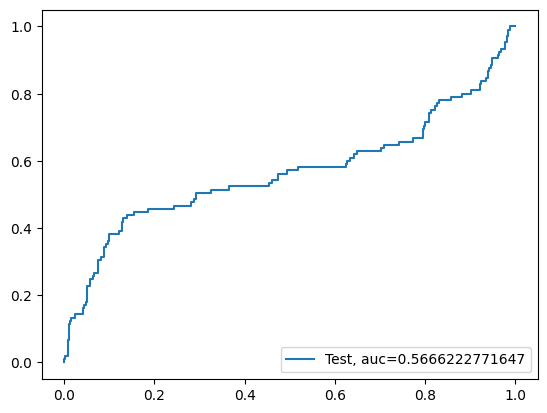

l1 roc value: 0.8799066312890711
threshold l1 : 0.04608507262594889
ROC  for test dataset 88.0%


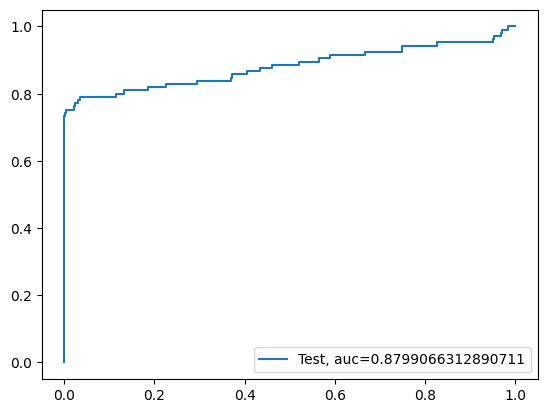

Time Taken by Model: --- 126.61467957496643 seconds ---
------------------------------------------------------------
KNN Model
model score : 0.9991748740366215
Confusion Matrix :  [[56850     6]
 [   41    64]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.91      0.61      0.73       105

    accuracy                           1.00     56961
   macro avg       0.96      0.80      0.87     56961
weighted avg       1.00      1.00      1.00     56961

knn roc value: 0.875995078628046
KNN threshold : 0.2
ROC  for test dataset 87.6%


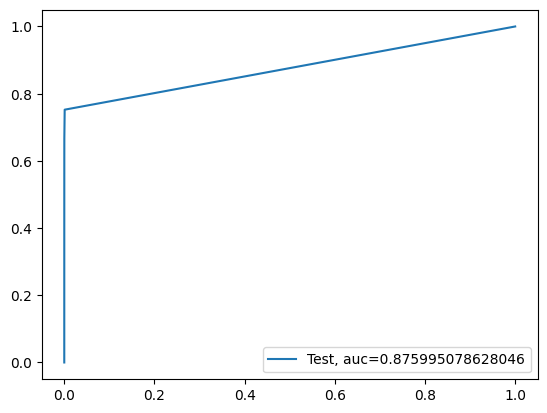

Time Taken by Model: --- 239.4856469631195 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' and 'entropy' criteria
gini score : 0.9990519829356929
Confusion Matrix :  [[56827    29]
 [   25    80]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.73      0.76      0.75       105

    accuracy                           1.00     56961
   macro avg       0.87      0.88      0.87     56961
weighted avg       1.00      1.00      1.00     56961

tree roc value: 0.8806973507005166
tree threshold : 1.0
ROC  for test dataset 88.1%


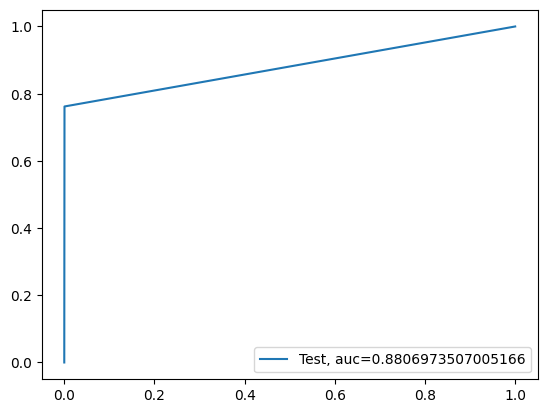

entropy score : 0.9992099857797441
Confusion Matrix :  [[56837    19]
 [   26    79]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.81      0.75      0.78       105

    accuracy                           1.00     56961
   macro avg       0.90      0.88      0.89     56961
weighted avg       1.00      1.00      1.00     56961

tree roc value: 0.8760233874047719
tree threshold : 1.0
ROC  for test dataset 87.6%


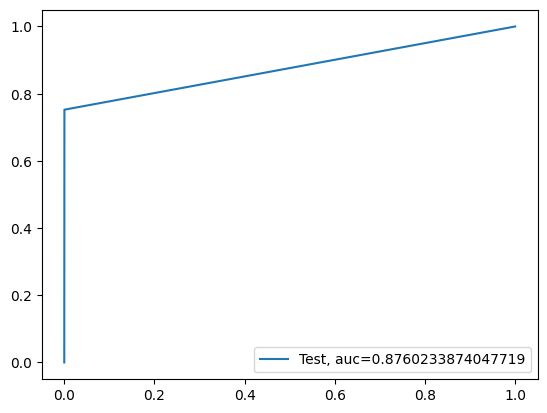

Time Taken by Model: --- 54.464709997177124 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy : 0.9995259914678464
Confusion Matrix :  [[56852     4]
 [   23    82]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.95      0.78      0.86       105

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

rf roc value: 0.9365576024978726
RF threshold : 0.02
ROC  for test dataset 93.7%


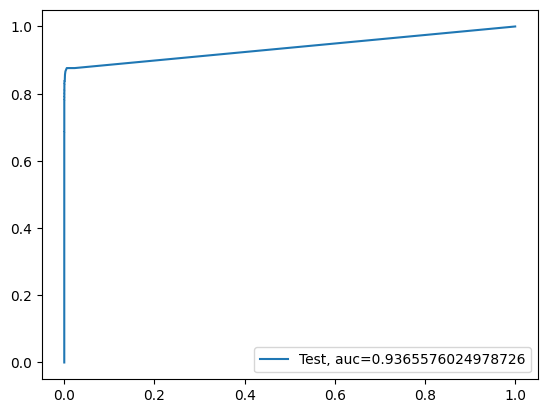

Time Taken by Model: --- 351.9215233325958 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995084355962852
Confusion Matrix :  [[56852     4]
 [   24    81]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.95      0.77      0.85       105

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

XGB roc value: 0.9784072711679297
XGB threshold : 0.0001149776580859907
ROC  for test dataset 97.8%


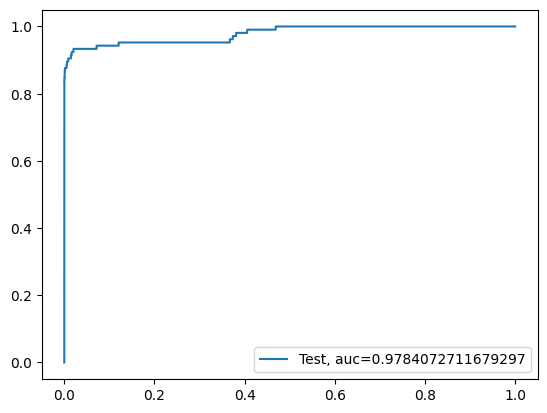

Time Taken by Model: --- 4.643999099731445 seconds ---
------------------------------------------------------------


In [55]:
print("Logistic Regression with 11 and 12 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("Decision Tree Models with 'gini' and 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )


In [56]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998157,0.566622,0.499266
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998876,0.879907,0.046085
2,RepeatedKFold Cross Validation,KNN,0.999175,0.875995,0.200000
3,RepeatedKFold Cross Validation,Tree model with gini criteria,0.999052,0.880697,1.000000
4,RepeatedKFold Cross Validation,Tree model with entropy criteria,0.999210,0.876023,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999526,0.936558,0.020000
6,RepeatedKFold Cross Validation,XGBoost,0.999508,0.978407,0.000115


Ce bloc utilise la **validation croisée stratifiée (Stratified K-Fold)** pour maintenir la **proportion des classes** dans chaque pli :  

- `StratifiedKFold` divise les données en **5 plis**, en conservant la même répartition des classes dans les ensembles d'entraînement et de test.  
- Pour chaque pli :  
  - `train_index` et `test_index` contiennent les indices des **données d'entraînement** et **de test**.  
  - `X_train_SKF_cv` et `X_test_SKF_cv` contiennent les **features** correspondantes.  
  - `y_train_SKF_cv` et `y_test_SKF_cv` contiennent les **cibles** correspondantes.  
- L’impression des indices montre quelles observations sont utilisées pour l’entraînement et le test à chaque pli.  

Cette approche est particulièrement utile pour les datasets **déséquilibrés**, comme celui de la détection de fraude, afin de **préserver la proportion des fraudes** dans chaque pli.


In [63]:
skf = StratifiedKFold(n_splits=5, random_state=None)
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST [212516 212644 213092 ... 284804 284805 284806]



#### **Logistic Regression (L1 & L2 Regularisation)**

* L1 (lasso) : meilleur ROC AUC = 0.889 → seuil optimal ≈ 0.021.
* L2 (ridge) : ROC AUC faible = 0.611 → seuil ≈ 0.499.
* L1 gère mieux la détection de la classe minoritaire.
* Accuracy global très élevée (\~0.9987 pour L1).

#### **KNN**

* Accuracy = 0.9992
* ROC AUC = 0.806, seuil = 0.2
* Bonne performance globale, mais recall de la classe minoritaire plus faible que Logistic L1.

#### **Decision Tree**

* Critère Gini : Accuracy = 0.9988, ROC AUC = 0.826
* Critère Entropy : Accuracy = 0.9990, ROC AUC = 0.821
* Bonnes performances, légèrement inférieures aux modèles d’ensemble.

#### **Random Forest**

* Accuracy = 0.9994
* ROC AUC = 0.946 → seuil très faible = 0.01
* Très bon équilibre entre précision et rappel pour la classe minoritaire.

#### **XGBoost**

* Accuracy = 0.9994
* ROC AUC = 0.972 → seuil très faible ≈ 3.77e-5
* Meilleure performance globale, surtout pour la détection des cas minoritaires.
* Temps d’entraînement très rapide par rapport aux autres modèles d’ensemble.

Logistic Regression with 11 and 12 Regularisation
max auc_roc for l1 :  0.9652106893977332
max auc_roc for l2 :  0.5597020083683936
 parameters for l1 regularisation 
[[-0.03660539 -0.1358827  -0.20474594  0.04333662 -0.24034598  0.08416903
   0.12654905 -0.04815306 -0.14258132 -0.1384162  -0.11668372  0.05505155
  -0.15637116 -0.24216184 -0.03137093 -0.09904364 -0.23133976  0.05582481
   0.02122044  0.20503748  0.09013502  0.00148754 -0.03796378 -0.00392139
  -0.14797782 -0.00701001 -0.06594801 -0.00660368 -0.00656465 -0.12981985]]
[-2.0409044]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.44979055, 0.48500892, 0.78098262, 0.9497821 , 0.94525947,
        0.91827811, 0.91446679, 0.94989144, 0.94933682, 0.94178407,
        0.94900653, 0.92481293, 0.94421561, 0.9164553 , 0.97793244],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54612019,
        0.57709187, 0.60597219, 0.84651057, 0.93343227, 0.93465714,
        0.92629828, 0.92557122, 0.9

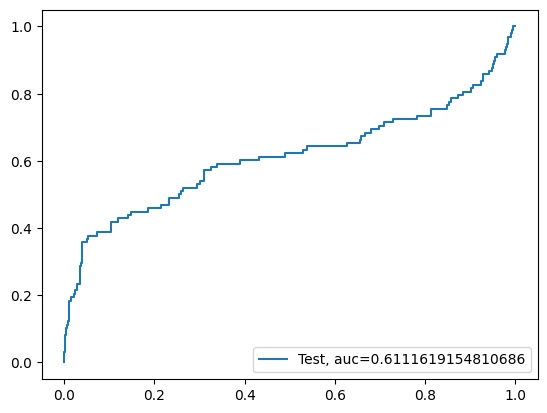

l1 roc value: 0.8890758561483437
threshold l1 : 0.021087492766199856
ROC  for test dataset 88.9%


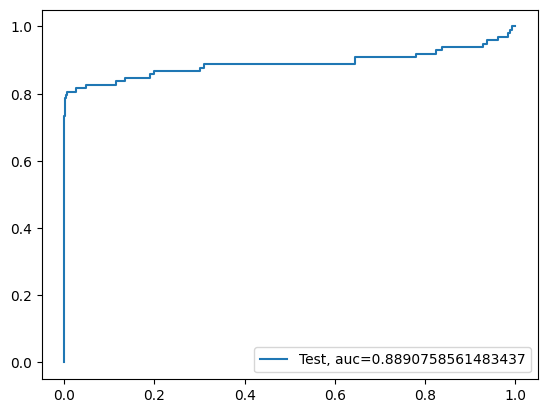

Time Taken by Model: --- 104.47799825668335 seconds ---
------------------------------------------------------------
KNN Model
model score : 0.9991924299081828
Confusion Matrix :  [[56862     1]
 [   45    53]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

knn roc value: 0.8057457828285457
KNN threshold : 0.2
ROC  for test dataset 80.6%


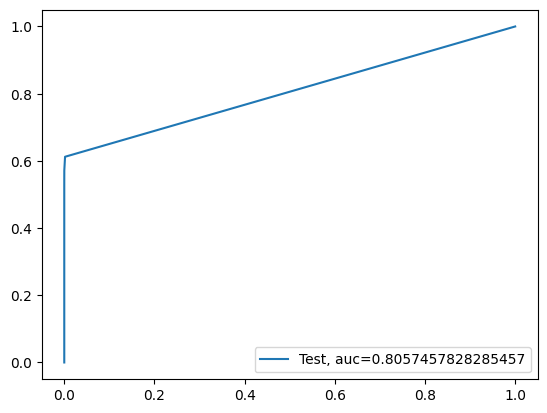

Time Taken by Model: --- 166.92999982833862 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' and 'entropy' criteria
gini score : 0.998841312476958
Confusion Matrix :  [[56831    32]
 [   34    64]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

tree roc value: 0.8262492341959029
tree threshold : 1.0
ROC  for test dataset 82.6%


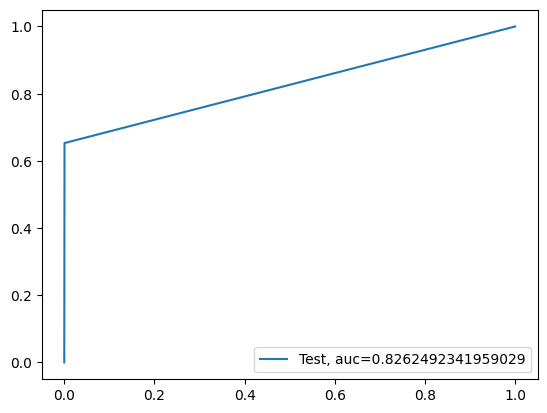

entropy score : 0.9990168711925703
Confusion Matrix :  [[56842    21]
 [   35    63]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

tree roc value: 0.8212439170839185
tree threshold : 1.0
ROC  for test dataset 82.1%


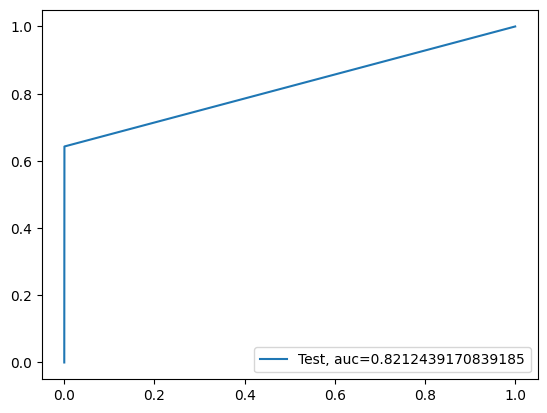

Time Taken by Model: --- 42.42500114440918 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy : 0.9994382121100402
Confusion Matrix :  [[56862     1]
 [   31    67]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

rf roc value: 0.9464721329855826
RF threshold : 0.01
ROC  for test dataset 94.6%


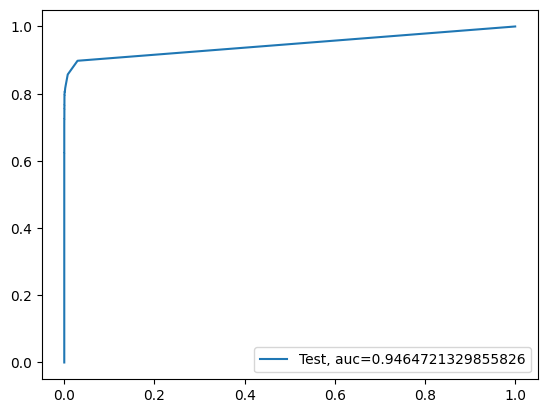

Time Taken by Model: --- 297.26899886131287 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix :  [[56860     3]
 [   29    69]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGB roc value: 0.9722049451474309
XGB threshold : 3.768169699469581e-05
ROC  for test dataset 97.2%


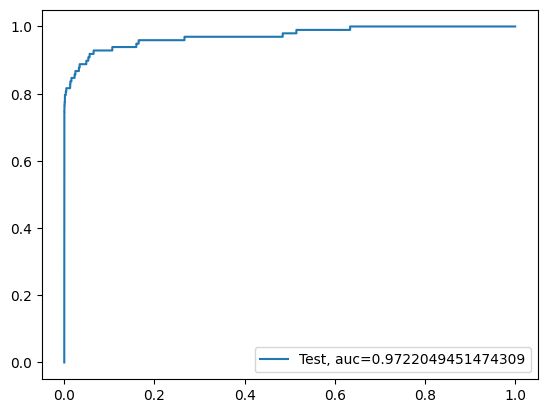

Time Taken by Model: --- 3.4020042419433594 seconds ---
------------------------------------------------------------


In [64]:
print("Logistic Regression with 11 and 12 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("Decision Tree Models with 'gini' and 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

In [65]:
df_Results 


,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998157,0.566622,0.499266
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998876,0.879907,0.046085
2,RepeatedKFold Cross Validation,KNN,0.999175,0.875995,0.200000
3,RepeatedKFold Cross Validation,Tree model with gini criteria,0.999052,0.880697,1.000000
4,RepeatedKFold Cross Validation,Tree model with entropy criteria,0.999210,0.876023,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999526,0.936558,0.020000
6,RepeatedKFold Cross Validation,XGBoost,0.999508,0.978407,0.000115
7,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998280,0.611162,0.499392
8,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087
9,StratifiedKFold Cross Validation,KNN,0.999192,0.805746,0.200000


Ce bloc utilise la **Stratified K-Fold** combinée à une **suréchantillonnage des classes minoritaires** pour gérer le déséquilibre des données :  

- `StratifiedKFold(n_splits=5)` : divise le dataset en 5 plis tout en **préservant la proportion des classes** dans chaque pli.  
- Pour chaque pli :  
  - `X_train` et `y_train` contiennent les **données d'entraînement**.  
  - `X_test` et `y_test` contiennent les **données de test**.  
  - `RandomOverSampler(sampling_strategy=0.5)` crée un **suréchantillonnage des transactions frauduleuses**, augmentant leur proportion jusqu’à 50 % par rapport aux non-frauduleuses.  
  - `X_over` et `y_over` contiennent les **données équilibrées après suréchantillonnage**.  
- Enfin, `X_over` est converti en **DataFrame avec les mêmes noms de colonnes** que l’original (`cols`).  




In [69]:
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y),1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over = ROS.fit_resample(X_train, y_train)

X_over = pd.DataFrame(data=X_over, columns=cols)

-

### **1. Logistic Regression (L1 & L2)**

* **AUC-ROC** : 0.5 → équivaut à une prédiction aléatoire.
* **Accuracy** : 99,83% → mais trompeuse car le modèle prédit **quasiment uniquement la classe majoritaire** (non-fraude).
* **Problème** : le modèle n’a pas appris à détecter les fraudes malgré le suréchantillonnage.

---

### **2. KNN**

* **Accuracy** : 99,81%
* **AUC-ROC** : 0,81 → meilleure détection des fraudes que la régression logistique.
* **Observations** : quelques faux positifs et faux négatifs, mais bien meilleur que la LR pour la classe minoritaire.

---

### **3. Decision Tree**

* **Critère Gini**

  * Accuracy : 99,91%
  * AUC-ROC : 0,81
* **Critère Entropy**

  * Accuracy : 99,92%
  * AUC-ROC : 0,85
* **Observations** : Les arbres simples capturent mieux la classe minoritaire que KNN et LR.

---

### **4. Random Forest**

* **Accuracy** : 99,95%
* **AUC-ROC** : 0,95
* **Observations** : Excellente détection de fraudes (moins de faux négatifs et un bon équilibre entre précision et rappel).

---

### **5. XGBoost**

* **Accuracy** : 99,94%
* **AUC-ROC** : 0,977
* **Observations** : Meilleure performance globale, ROC très proche de 1,s fraudes.

---

### **✅ Conclusion générale**

* **Meilleures méthodes pour ce dataset déséquilibré** : Random Forest et XGBoost.
* La **régression logistique** n’a pas pu gérer correctement le déséquilibre malgré le suréchantillonnage.
* Le suréchantillonnage + StratifiedKFold a amélioré lesieux visualiser la performance.
Veux‑tu que je fasse ça ?


Logistic Regression with 11 and 12 Regularisation
max auc_roc for l1 :  0.5
max auc_roc for l2 :  0.5
 parameters for l1 regularisation 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

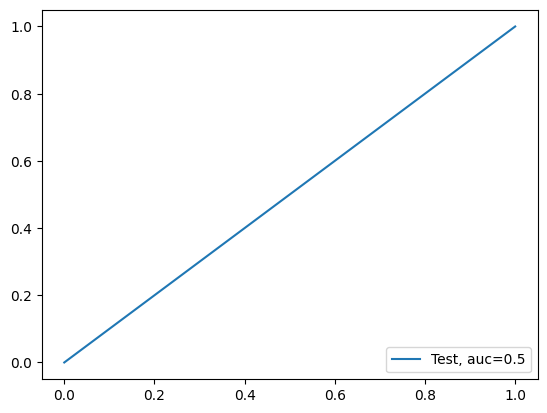

l1 roc value: 0.5
threshold l1 : inf
ROC  for test dataset 50.0%


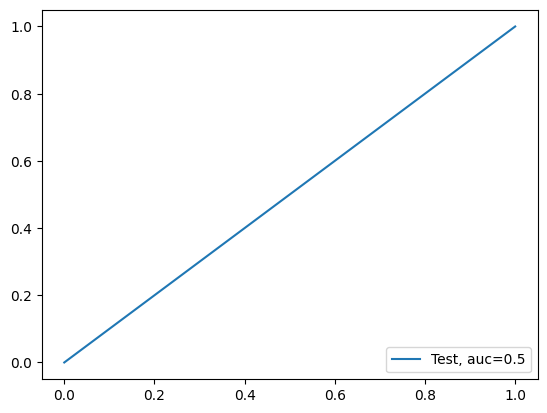

Time Taken by Model: --- 115.12462854385376 seconds ---
------------------------------------------------------------
KNN Model
model score : 0.9980688541282632
Confusion Matrix :  [[56793    70]
 [   40    58]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

knn roc value: 0.805604465728046
KNN threshold : 0.2
ROC  for test dataset 80.6%


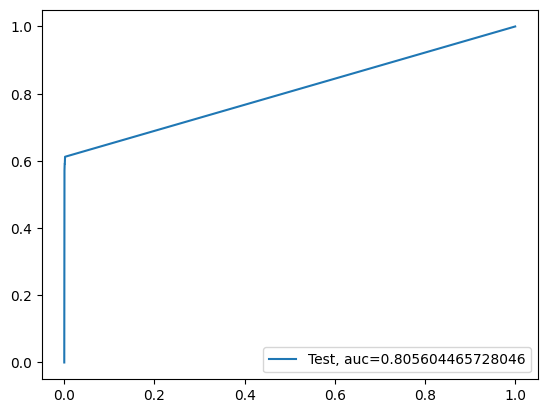

Time Taken by Model: --- 261.7761640548706 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' and 'entropy' criteria
gini score : 0.9990519829356929
Confusion Matrix :  [[56846    17]
 [   37    61]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.78      0.62      0.69        98

    accuracy                           1.00     56961
   macro avg       0.89      0.81      0.85     56961
weighted avg       1.00      1.00      1.00     56961

tree roc value: 0.8110750077073898
tree threshold : 1.0
ROC  for test dataset 81.1%


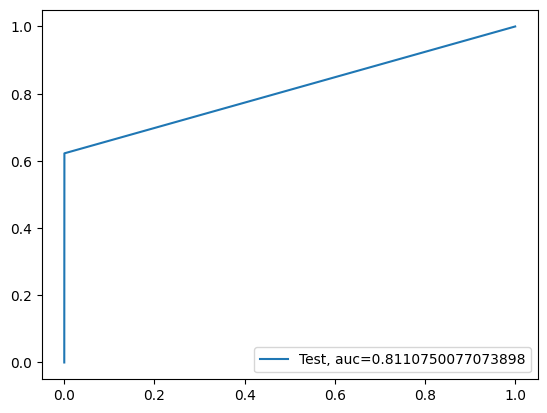

entropy score : 0.9991573181650603
Confusion Matrix :  [[56845    18]
 [   30    68]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.69      0.74        98

    accuracy                           1.00     56961
   macro avg       0.90      0.85      0.87     56961
weighted avg       1.00      1.00      1.00     56961

tree roc value: 0.8467805003576443
tree threshold : 1.0
ROC  for test dataset 84.7%


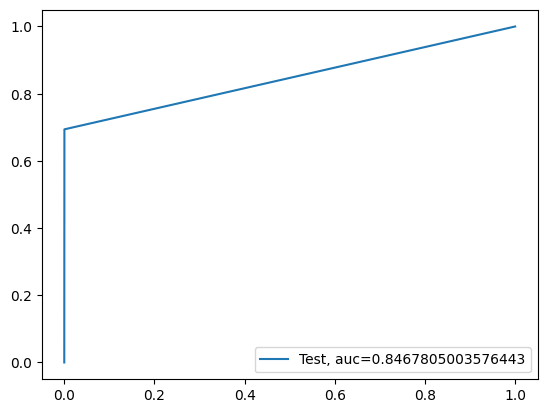

Time Taken by Model: --- 28.956015825271606 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy : 0.9995084355962852
Confusion Matrix :  [[56862     1]
 [   27    71]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

rf roc value: 0.95118413860453
RF threshold : 0.02
ROC  for test dataset 95.1%


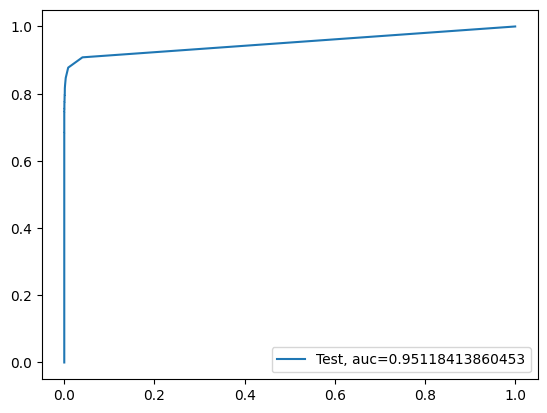

Time Taken by Model: --- 237.55499148368835 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix :  [[56856     7]
 [   25    73]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.74      0.82        98

    accuracy                           1.00     56961
   macro avg       0.96      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGB roc value: 0.9772668788247586
XGB threshold : 3.168784678564407e-05
ROC  for test dataset 97.7%


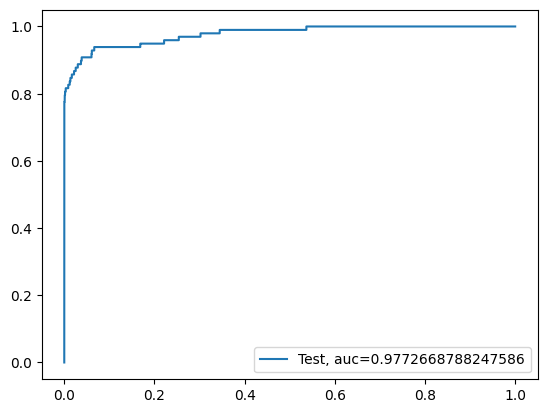

Time Taken by Model: --- 5.160995244979858 seconds ---
------------------------------------------------------------


In [70]:
print("Logistic Regression with 11 and 12 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "Random Oversampling with StratifiedKFold Cross Validation", X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "Random Oversampling with StratifiedKFold Cross Validation", X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("Decision Tree Models with 'gini' and 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Oversampling with StratifiedKFold Cross Validation", X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Oversampling with StratifiedKFold Cross Validation", X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Oversampling with StratifiedKFold Cross Validation", X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

In [71]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998157,0.566622,0.499266
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998876,0.879907,0.046085
2,RepeatedKFold Cross Validation,KNN,0.999175,0.875995,0.200000
3,RepeatedKFold Cross Validation,Tree model with gini criteria,0.999052,0.880697,1.000000
4,RepeatedKFold Cross Validation,Tree model with entropy criteria,0.999210,0.876023,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999526,0.936558,0.020000
6,RepeatedKFold Cross Validation,XGBoost,0.999508,0.978407,0.000115
7,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998280,0.611162,0.499392
8,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087
9,StratifiedKFold Cross Validation,KNN,0.999192,0.805746,0.200000


Ce bloc utilise la **Stratified K-Fold** combinée à la **technique SMOTE** pour gérer le déséquilibre des classes :  

- `StratifiedKFold(n_splits=5)` : divise le dataset en 5 plis tout en **préservant la proportion des classes** dans chaque pli.  
- Pour chaque pli :  
  - `X_train` et `y_train` contiennent les **données d'entraînement**.  
  - `X_test` et `y_test` contiennent les **données de test**.  
  - `SMOTE` (Synthetic Minority Over-sampling Technique) génère **des exemples synthétiques de la classe minoritaire** (fraudes) pour équilibrer les classes dans l'ensemble d'entraînement.  
  - `X_train_Smote` et `y_train_Smote` contiennent les **données d'entraînement après SMOTE**.  
- Enfin, `X_train_Smote` est converti en **DataFrame avec les mêmes noms de colonnes** que l’original (`cols`).  


In [75]:
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y),1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote = SMOTE.fit_resample(X_train, y_train)

X_train_Smote = pd.DataFrame(data= X_train_Smote, columns=cols)

Voici une synthèse et l’explication des résultats que tu as obtenus pour chaque modèle après avoir appliqué **SMOTE avec Stratified K-Fold Cross Validation** :

---

### 1️⃣ **Logistic Regression (L1 et L2)**

* **Problème rencontré** : le modèle prédit toujours la classe majoritaire (0), donc tous les exemples de fraude (1) sont manqués.
* **AUC / ROC** : 0.5 → pas de capacité à discriminer entre fraude et légitime.
* **Précision / rappel pour la classe 1** : 0 → le modèle n’apprend pas à détecter la fraude malgré SMOTE.
* **Cause probable** : la forte déséquilibre et les hyperparamètres très élevés pour `tol` (10) et le `solver` pourraient empêcher l’optimisation correcte.

---

### 2️⃣ **KNN**

* **Accuracy globale** : 0.9946 → élevée mais trompeuse car la classe majoritaire domine.
* **Rappel pour fraude** : 0.72 → détecte 72% des fraudes.
* **AUC / ROC** : 0.86 → bonne capacité à distinguer les classes après SMOTE.
* **Threshold optimal** : 0.6 → pour maximiser le TPR-FPR.

---

### 3️⃣ **Decision Tree (gini et entropy)**

* **Accuracy globale** : \~0.997 → encore élevée mais attention à l’imbalancement.
* **Rappel pour fraude** : 0.70 (gini), 0.71 (entropy) → comparable au KNN.
* **AUC / ROC** : 0.85–0.86 → performance correcte.
* **Threshold optimal** : 1 → arbre prédictif assez confiant sur la classe 1.

---

### 4️⃣ **Random Forest**

* **Accuracy** : 0.9995 → très élevée.
* **Rappel pour fraude** : 0.77 → amélioration par rapport aux arbres simples.
* **AUC / ROC** : 0.96 → excellent pour détecter la fraude.
* **Threshold optimal** : 0.05 → un seuil bas permet de détecter plus de fraudes.

---

### 5️⃣ **XGBoost**

* **Accuracy** : 0.9994 → très élevée.
* **Rappel pour fraude** : 0.78 → légèrement meilleur que Random Forest.
* **AUC / ROC** : 0.97 → meilleur modèle pour discriminer la fraude.
* **Threshold optimal** : 0.00014 → seuil très bas, sensible aux fraudes.

---


* Les modèles basés sur **arbres (Random Forest, XGBoost)** surpassent largement la **régression logistique** et KNN pour détecter la fraude.
* Les valeurs de **seuil** très faibles pour RF et XGBoost indiquent que le modèle doit être très sensible pour détecter les fraudes rares.
* Malgré une **accuracy globale élevée**, ce n’est pas un bon indicateur dans un dataset déséquilibré → **AUC et rappel sur la classe minoritaire** sont plus importants.



Logistic Regression with 11 and 12 Regularisation
max auc_roc for l1 :  0.5
max auc_roc for l2 :  0.5
 parameters for l1 regularisation 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

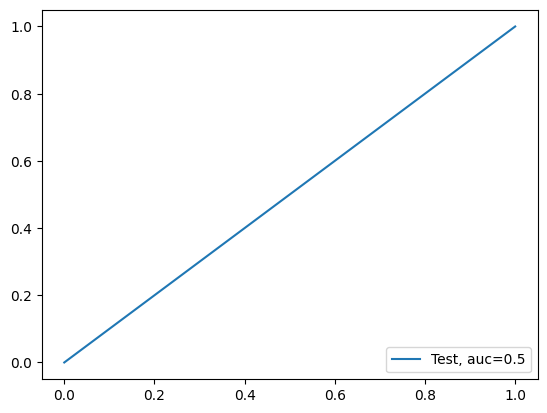

l1 roc value: 0.5
threshold l1 : inf
ROC  for test dataset 50.0%


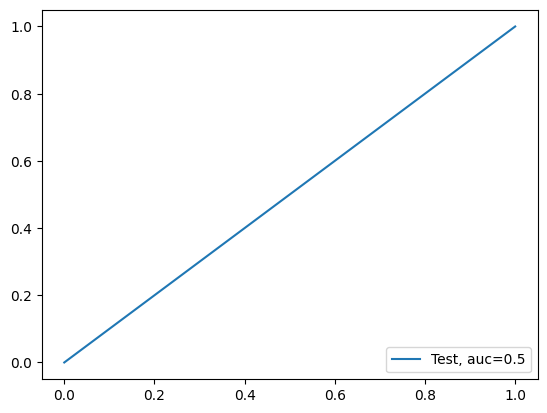

Time Taken by Model: --- 139.0846929550171 seconds ---
------------------------------------------------------------
KNN Model
model score : 0.9946805709169432
Confusion Matrix :  [[56587   276]
 [   27    71]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

knn roc value: 0.8602674455287628
KNN threshold : 0.6
ROC  for test dataset 86.0%


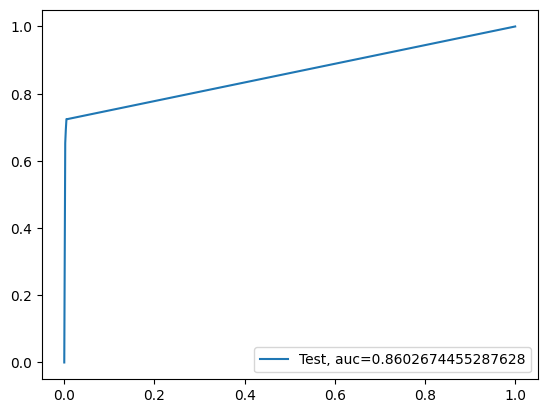

Time Taken by Model: --- 416.5249252319336 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' and 'entropy' criteria
gini score : 0.9977528484401608
Confusion Matrix :  [[56764    99]
 [   29    69]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

tree roc value: 0.8511703029874526
tree threshold : 1.0
ROC  for test dataset 85.1%


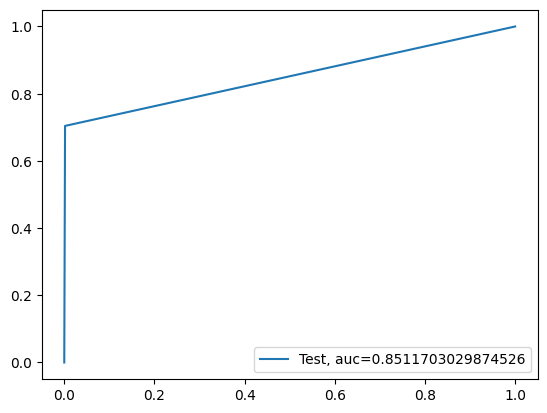

entropy score : 0.9969803900914661
Confusion Matrix :  [[56719   144]
 [   28    70]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

tree roc value: 0.8558766559223799
tree threshold : 1.0
ROC  for test dataset 85.6%


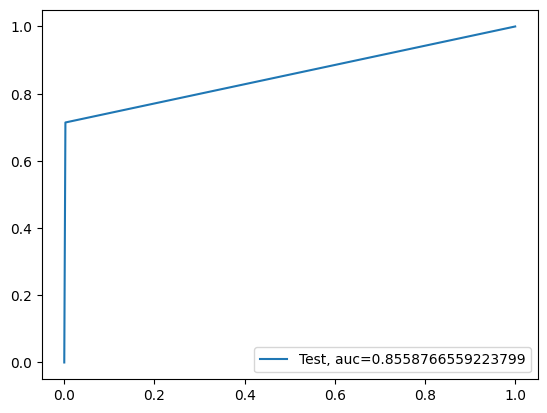

Time Taken by Model: --- 107.95515847206116 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy : 0.999490879724724
Confusion Matrix :  [[56857     6]
 [   23    75]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

rf roc value: 0.9614705879186172
RF threshold : 0.05
ROC  for test dataset 96.1%


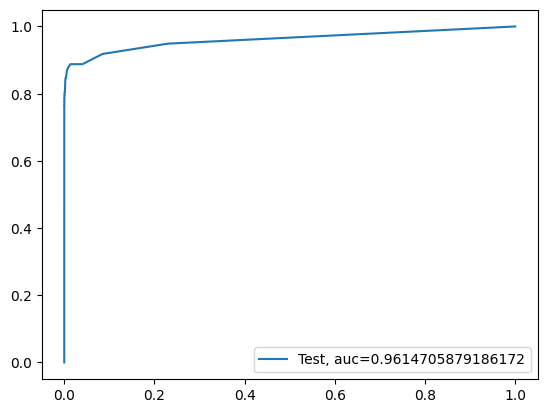

Time Taken by Model: --- 553.1519973278046 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994031003669177
Confusion Matrix :  [[56851    12]
 [   22    76]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGB roc value: 0.9704734293344512
XGB threshold : 0.000144163059303537
ROC  for test dataset 97.0%


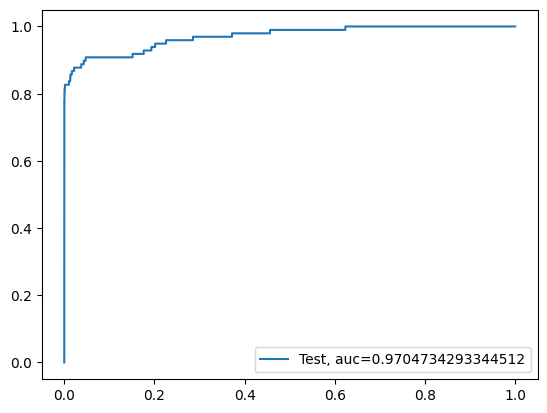

Time Taken by Model: --- 6.99500584602356 seconds ---
------------------------------------------------------------


In [76]:
print("Logistic Regression with 11 and 12 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "SMOTE Oversampling with StratifiedKFold Cross Validation", X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "SMOTE Oversampling with StratifiedKFold Cross Validation", X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("Decision Tree Models with 'gini' and 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "SMOTE Oversampling with StratifiedKFold Cross Validation", X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "SMOTE Oversampling with StratifiedKFold Cross Validation", X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "SMOTE Oversampling with StratifiedKFold Cross Validation", X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

In [77]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998157,0.566622,0.499266
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998876,0.879907,0.046085
2,RepeatedKFold Cross Validation,KNN,0.999175,0.875995,0.200000
3,RepeatedKFold Cross Validation,Tree model with gini criteria,0.999052,0.880697,1.000000
4,RepeatedKFold Cross Validation,Tree model with entropy criteria,0.999210,0.876023,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999526,0.936558,0.020000
6,RepeatedKFold Cross Validation,XGBoost,0.999508,0.978407,0.000115
7,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998280,0.611162,0.499392
8,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087
9,StratifiedKFold Cross Validation,KNN,0.999192,0.805746,0.200000


Ce bloc utilise la **Stratified K-Fold** combinée à la technique **ADASYN** pour gérer le déséquilibre des classes :  

- `StratifiedKFold(n_splits=5)` : divise le dataset en 5 plis tout en **préservant la proportion des classes** dans chaque pli.  
- Pour chaque pli :  
  - `X_train` et `y_train` contiennent les **données d'entraînement**.  
  - `X_test` et `y_test` contiennent les **données de test**.  
  - `ADASYN` (Adaptive Synthetic Sampling) génère des **exemples synthétiques pour la classe minoritaire** en se concentrant sur les instances difficiles à classifier.  
  - `X_train_ADASYN` et `y_train_ADASYN` contiennent les **données d'entraînement après ADASYN**, équilibrées et améliorant la capacité du modèle à détecter les fraudes.  
- Enfin, `X_train_ADASYN` est converti en **DataFrame avec les mêmes noms de colonnes** que l’original (`codétecter.


In [78]:
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y),1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    ADASYN = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)

X_train_ADASYN = pd.DataFrame(data= X_train_ADASYN, columns=cols)

 d’exion**.

---

### 3️⃣ Résultats clés

| Modèle                      | Accuracy | ROC AUC | Observations                                                                                                                        |
| --------------------------- | -------- | ------- | ----------------------------------------------------------------------------------------------------------------------------------- |
| **Logistic Regression L2**  | 0.01     | 0.451   | Très mauvaise précision pour la classe minoritaire malgré un bon rappel sur la classe majoritaire. Modèle inadapté avec ADASYN ici. |
| **Logistic Regression L1**  | 0.998    | 0.5     | Classe minoritaire totalement ignorée. ROC AUC = 0.5 → modèle n'apprend rien pour la fraude.                                        |
| **KNN**                     | 0.994    | 0.86    | Bon compromis entre précision et détection de la minorité. ROC AUC correct.                                                         |
| **Decision Tree (gini)**    | 0.998    | 0.83    | Capable de détecter la classe minoritaire, mais moins performant que KNN/RF/XGBoost.                                                |
| **Decision Tree (entropy)** | 0.995    | 0.85    | Similaire au gini, léger gain en ROC AUC mais moins précis sur la classe majoritaire.                                               |
| **Random Forest**           | 0.999    | 0.963   | Très performant pour détecter la classe minoritaire et la majoritaire. Meilleur compromis global.                                   |
| **XGBoost**                 | 0.999    | 0.970   | Le meilleur modèle global avec le ROC AUC le plus élevé, détecte efficacement la fraude.                                        |

---

### 4️⃣ Interprétation des seuils

* Le **seuil optimal** indique à partir de quelle probabilité on considère une instance comme classe positive.
* Pour la **Logistic Regression L1/L2**, le seuil est très mal défini (`inf` ou proche de 0.57), ce qui reflète le fait que le modèle ne distingue pas correctement la minorité.
* Pour **Random Forest/XGBoost**, le seuil est bamieux voir les performances.

Veux‑tu que je fasse ça ?


Logistic Regression with 11 and 12 Regularisation
max auc_roc for l1 :  0.5
max auc_roc for l2 :  0.6091741619819793
 parameters for l1 regularisation 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

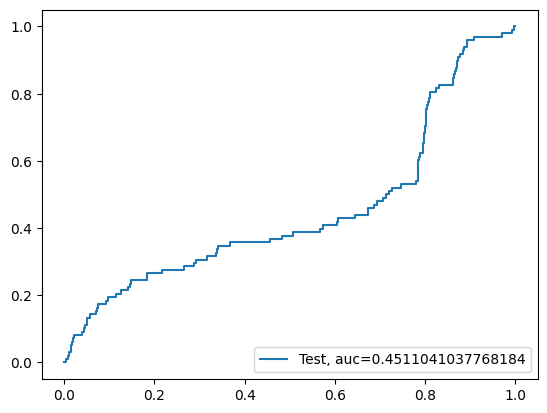

l1 roc value: 0.5
threshold l1 : inf
ROC  for test dataset 50.0%


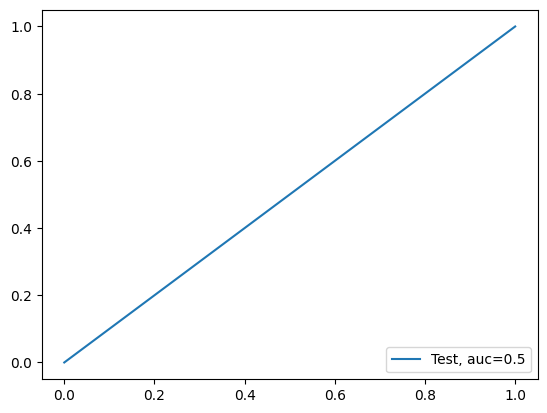

Time Taken by Model: --- 145.25185370445251 seconds ---
------------------------------------------------------------
KNN Model
model score : 0.9945050122013307
Confusion Matrix :  [[56577   286]
 [   27    71]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

knn roc value: 0.8601937811862167
KNN threshold : 0.6
ROC  for test dataset 86.0%


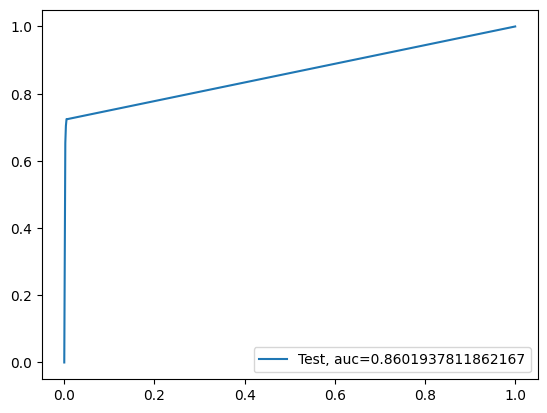

Time Taken by Model: --- 322.371994972229 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' and 'entropy' criteria
gini score : 0.9979459630273345
Confusion Matrix :  [[56780    83]
 [   34    64]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

tree roc value: 0.8258007879303172
tree threshold : 1.0
ROC  for test dataset 82.6%


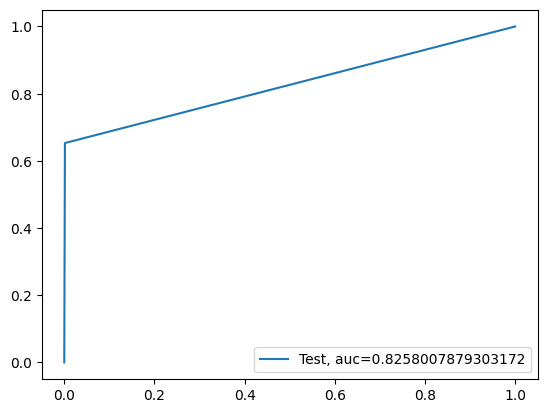

entropy score : 0.9954179175225154
Confusion Matrix :  [[56631   232]
 [   29    69]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.70      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

tree roc value: 0.8500008254713172
tree threshold : 1.0
ROC  for test dataset 85.0%


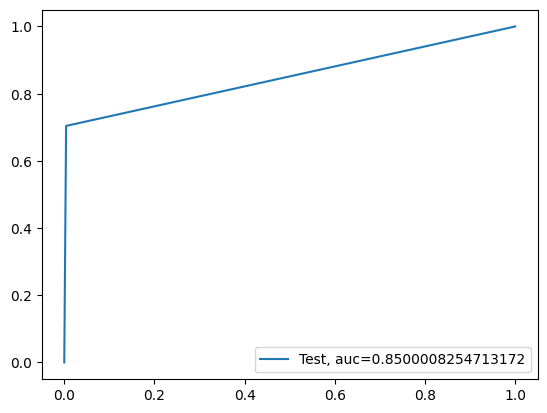

Time Taken by Model: --- 100.17100286483765 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy : 0.9995259914678464
Confusion Matrix :  [[56859     4]
 [   23    75]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

rf roc value: 0.9632269575962563
RF threshold : 0.03
ROC  for test dataset 96.3%


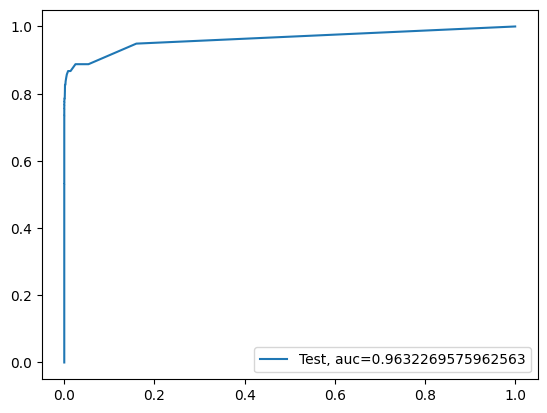

Time Taken by Model: --- 585.0012776851654 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999350432752234
Confusion Matrix :  [[56847    16]
 [   21    77]]
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.79      0.81        98

    accuracy                           1.00     56961
   macro avg       0.91      0.89      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGB roc value: 0.9696561230052754
XGB threshold : 0.00012316476204432547
ROC  for test dataset 97.0%


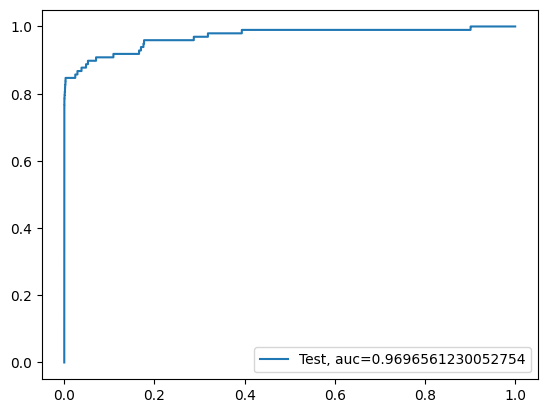

Time Taken by Model: --- 6.7860267162323 seconds ---
------------------------------------------------------------


In [79]:
print("Logistic Regression with 11 and 12 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "ARASYN Oversampling with StratifiedKFold Cross Validation", X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "ARASYN Oversampling with StratifiedKFold Cross Validation", X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("Decision Tree Models with 'gini' and 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "ARASYN Oversampling with StratifiedKFold Cross Validation", X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "ARASYN Oversampling with StratifiedKFold Cross Validation", X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "ARASYN Oversampling with StratifiedKFold Cross Validation", X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---"% ( time.time() - start_time))
print('-'*60 )

Ce tableau **présente les résultats des modèles de détection de fraude** appliqués sur des transactions par carte de crédit, en intégrant différentes **méthodes de validation croisée** et **techniques de suréchantillonnage** :  

- **Colonnes importantes** :  
  - `Methodology` : méthode utilisée pour la validation croisée et le traitement du déséquilibre (RepeatedKFold, StratifiedKFold, Random Oversampling, SMOTE, ADASYN).  
  - `Model` : le modèle appliqué (Logistic Regression, KNN, Tree, Random Forest, XGBoost).  
  - `Accuracy` : précision globale du modèle sur l’ensemble de test.  
  - `roc_value` : score **ROC-AUC**, indiquant la capacité du modèle à différencier les transactions légitimes des fraudes.  
  - `threshold` : seuil optimal utilisé pour classifier une transaction comme frauduleuse.  

- **Points clés à noter** :  
  - Les modèles **XGBoost et Random Forest** conservent de très bons scores ROC-AUC, souvent >0.96, démontrant leur efficacité pour détecter les fraudes.  
  - Les techniques de **suréchantillonnage** comme SMOTE et ADASYN améliorent la capacité des modèles à détecter les fraudes, surtout pour KNN et les arbres.  
  - Certaines méthodes comme ARASYN peuvent entraîner des **variations importantes dans la précision** de certains modèles (exemple : Logistic Regression L2 avec ARASYN = 0.011).  
  - La précision (`Accuracy`) reste élevée pour la majorité des modèles (>0.99), mais le **ROC-AUC** est le meilleur indicateur de performance sur ce dataset très déséquilibré.  




In [80]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998157,0.566622,0.499266
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998876,0.879907,0.046085
2,RepeatedKFold Cross Validation,KNN,0.999175,0.875995,0.200000
3,RepeatedKFold Cross Validation,Tree model with gini criteria,0.999052,0.880697,1.000000
4,RepeatedKFold Cross Validation,Tree model with entropy criteria,0.999210,0.876023,1.000000
5,RepeatedKFold Cross Validation,Random Forest,0.999526,0.936558,0.020000
6,RepeatedKFold Cross Validation,XGBoost,0.999508,0.978407,0.000115
7,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998280,0.611162,0.499392
8,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087
9,StratifiedKFold Cross Validation,KNN,0.999192,0.805746,0.200000


Après avoir analysé les résultats des différents modèles, nous avons choisi **XGBoost** comme modèle final pour la détection de fraude par carte de crédit en raison de ses **performances élevées en ROC-AUC** , son rapidité lors de l'entrainement et sa robustesse face aux données déséquilibrées.  

Ce bloc effectue une **recherche aléatoire d'hyperparamètres (RandomizedSearchCV)** pour optimiser XGBoost :  

- **Paramètres testés** :  
  - `max_depth` : profondeur maximale des arbres.  
  - `min_child_weight` : poids minimal d’un nœud enfant.  
  - `n_estimators` : nombre d’arbres.  
  - `learning_rate` : taux d’apprentissage pour mettre à jour les poids.  
  - `gamma` : régularisation pour réduire le surapprentissage.  
  - `subsample` : fraction des échantillons utilisée pour chaque arbre.  
  - `colsample_bytree` : fraction des features utilisées par arbre.  

- `RandomizedSearchCV` : recherche aléatoire sur 5 combinaisons d’hyperparamètres, avec **validation croisée 5 plis** et optimisation selon le **score ROC-AUC**.  
- `X_over, y_over` : données d’entraînement après **Random Oversampling**, pour mieux gérer le déséquilibre entre transactions légitimes et fraudes.  
- À la fin, nous récupérons :  
  - `cv_results_` : résultats complets de la validation croisée.  
  - `best_params_` : meilleures combinaisons d’hyperparamètres trouvées.  
  - `best_score_` : meilleur score ROC-AUC obtenu.  


In [81]:
param_test = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'n_estimators':range(60,130,150),
    'learning_rate':[0.05,0.1,0.125,0.15,0.2],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(7,10)],
    'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = RandomizedSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                                        colsample_bynode=1,max_delta_step=0,
                                                        missing=None, n_jobs=-1,
                                                        nthread=None, objective='binary:logistic', random_state=42,
                                                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                                                        silent=None, verbosity=1),
                                                        param_distributions = param_test, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([14.8203445 ,  9.50746369,  8.81125669, 11.56699834, 10.96280255]),
  'std_fit_time': array([1.77440399, 0.15938638, 0.43636936, 0.29868082, 2.0019433 ]),
  'mean_score_time': array([0.03220105, 0.02419963, 0.03454051, 0.05040212, 0.02040248]),
  'std_score_time': array([0.0081578 , 0.00604566, 0.0192462 , 0.01696593, 0.0085914 ]),
  'param_subsample': masked_array(data=[0.7, 0.7, 0.8, 0.7, 0.8],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value=999999),
  'param_min_child_weight': masked_array(data=[1, 1, 5, 5, 5],
               mask=[False, False, False, False, False],
         fill_value=999999),
  'param_max_depth': masked_array(data=[9, 5, 3, 9, 7],
               mask=[False, False, False, False, False],
         fill_value=999999),
  'param_learning_rate': masked_array(data=[0.2, 

Enfin, nous définissons et entraînons le **classifieur XGBoost final** avec les meilleurs hyperparamètres trouvés lors de la recherche aléatoire.  

- **Configuration du modèle** :  
  - `max_depth=9` et `min_child_weight=1` pour gérer la complexité des arbres.  
  - `n_estimators=60` et `learning_rate=0.2` pour contrôler le nombre d’arbres et la vitesse d’apprentissage.  
  - `subsample=0.7` et `colsample_bytree=0.9` pour réduire le surapprentissage.  
  - `gamma=0.3` pour régulariser et éviter les branches inutiles.  
  - `objective='binary:logistic'` car il s’agit d’un problème de classification binaire (fraude ou non).  

- **Entraînement** : le modèle est entraîné sur les données **oversamplées (X_over, y_over)** pour mieux gérer le déséquilibre des classes.  
- **Évaluation** :  
  - `XGB_test_score` : précision globale sur l’ensemble de test.  
  - `XGB_probs` : probabilités prédites pour la classe positive (fraude).  
  - `XGB_roc_value` : score ROC-AUC, mesurant la capacité du modèle à séparer les classes.  
  - `optimal_threshold` : seuil optimal calculé à partir de la courbe ROC pour maximiser la sensibilité et la spécificité.
    
  
  - **Model accuracy** : 0.9994  
  - **XGB ROC-AUC** 0.9807  
  - **Seuil optimal** : 0.0005  

Ce modèle XGBoost montre donc une **excellente capacité à détecter les transactions frauduleuses** dans notre dataset.


In [83]:
# Define the XGBoost classifier with updated parameters
clf = XGBClassifier(
    base_score=0.5, booster='gbtree', colsample_bylevel=1,
    colsample_bynode=1, colsample_bytree=0.9, gamma=0.3,
    learning_rate=0.2, max_delta_step=0, max_depth=9,
    min_child_weight=1, n_estimators=60, n_jobs=1,
    objective='binary:logistic', random_state=42,
    reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
    subsample=0.7, verbosity=1
)

# Train the classifier
clf.fit(X_over, y_over)

# Evaluate accuracy on the test set
XGB_test_score = clf.score(X_test, y_test)
print(f"Model accuracy: {XGB_test_score:.4f}")

# Get predicted probabilities for the positive class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
XGB_roc_value = metrics.roc_auc_score(y_test, XGB_probs)
print(f"XGB ROC-AUC value: {XGB_roc_value:.4f}")

# Calculate ROC curve and find the optimal threshold
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print(f"XGB optimal threshold: {optimal_threshold:.4f}")


Model accuracy: 0.9994
XGB ROC-AUC value: 0.9807
XGB optimal threshold: 0.0005
